In [341]:
import pandas as pd 
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

In [28]:
with open('data.json') as file: 
    data = json.load(file)

# data.json must be cleaned manually

In [20]:
data

[{'continent': 'Europe',
  'country': 'Isle-of-Man',
  'population': 85732,
  'cases': {'new': None,
   'active': None,
   'critical': None,
   'recovered': None,
   '1M_pop': '443335',
   'total': 38008},
  'deaths': {'new': None, '1M_pop': '1353', 'total': 116},
  'tests': {'1M_pop': '1758422', 'total': 150753},
  'day': '2023-04-24',
  'time': '2023-04-24T21:15:08+00:00'},
 {'continent': 'Africa',
  'country': 'Lesotho',
  'population': 2175699,
  'cases': {'new': None,
   'active': 8087,
   'critical': None,
   'recovered': 25980,
   '1M_pop': '15990',
   'total': 34790},
  'deaths': {'new': None, '1M_pop': '332', 'total': 723},
  'tests': {'1M_pop': '198199', 'total': 431221},
  'day': '2023-04-24',
  'time': '2023-04-24T21:15:08+00:00'},
 {'continent': 'Europe',
  'country': 'Faeroe-Islands',
  'population': 49233,
  'cases': {'new': None,
   'active': None,
   'critical': 5,
   'recovered': None,
   '1M_pop': '703959',
   'total': 34658},
  'deaths': {'new': None, '1M_pop': '569

In [21]:
hh=pd.DataFrame(data, columns=['continent', 'country', 'population', 'cases', 'active', 'critical', 'recovered', '1M_pop', 'total', 'deaths', 'tests', 'day', 'time'])
hh.explode('cases')
hh = pd.json_normalize(json.loads(hh.to_json(orient='records')))
hh

,continent,country,population,active,critical,recovered,1M_pop,total,day,time,...,cases.active,cases.critical,cases.recovered,cases.1M_pop,cases.total,deaths.new,deaths.1M_pop,deaths.total,tests.1M_pop,tests.total
0,Europe,Isle-of-Man,85732.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:08+00:00,...,NaN,NaN,NaN,443335,38008,None,1353,116.0,1758422,150753.0
1,Africa,Lesotho,2175699.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:08+00:00,...,8087.0,NaN,25980.0,15990,34790,None,332,723.0,198199,431221.0
2,Europe,Faeroe-Islands,49233.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:08+00:00,...,NaN,5.0,NaN,703959,34658,None,569,28.0,15802409,778000.0
3,North-America,Cayman-Islands,67277.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:08+00:00,...,22882.0,1.0,8553.0,467797,31472,None,550,37.0,3311280,222773.0
4,Africa,Congo,5797805.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:08+00:00,...,983.0,NaN,24006.0,4377,25375,None,67,386.0,59991,347815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Europe,Europe,NaN,None,None,None,None,None,2023-04-24,2023-04-24T21:15:06+00:00,...,2217802.0,6417.0,244415131.0,None,248682497,+95,None,2049564.0,None,NaN
234,Africa,Africa,NaN,None,None,None,None,None,2023-04-24,2023-04-24T21:15:06+00:00,...,475343.0,548.0,12083563.0,None,12817611,None,None,258705.0,None,NaN
235,All,All,NaN,None,None,None,None,None,2023-04-24,2023-04-24T21:15:06+00:00,...,20594702.0,39485.0,659101332.0,88079,686556061,+145,880.1,6860027.0,None,NaN
236,Europe,France,65584518.0,None,None,None,None,None,2023-04-24,2023-04-24T21:15:06+00:00,...,143697.0,869.0,39641446.0,609159,39951432,None,2535,166289.0,4139547,271490188.0


In [22]:
df = hh.drop(['active', 'critical', 'recovered', '1M_pop', 'total'], axis=1)
df.head(3)

,continent,country,population,day,time,cases.new,cases.active,cases.critical,cases.recovered,cases.1M_pop,cases.total,deaths.new,deaths.1M_pop,deaths.total,tests.1M_pop,tests.total
0,Europe,Isle-of-Man,85732.0,2023-04-24,2023-04-24T21:15:08+00:00,None,NaN,NaN,NaN,443335,38008,None,1353,116.0,1758422,150753.0
1,Africa,Lesotho,2175699.0,2023-04-24,2023-04-24T21:15:08+00:00,None,8087.0,NaN,25980.0,15990,34790,None,332,723.0,198199,431221.0
2,Europe,Faeroe-Islands,49233.0,2023-04-24,2023-04-24T21:15:08+00:00,None,NaN,5.0,NaN,703959,34658,None,569,28.0,15802409,778000.0


In [46]:
df = df.rename(columns={'cases.new': 'new cases','cases.active': 'active cases', 'cases.critical':'critical cases', 'cases.recovered':'recovered cases', 'cases.1M_pop':'cases per million', 'cases.total':'total cases', 'deaths.new':'new deaths','deaths.1M_pop':'deaths per million','deaths.total':'total deaths', 'tests.1M_pop':'tests per million', 'tests.total':'total tests'})
df

,continent,country,population,day,time,new cases,active cases,critical cases,recovered cases,cases per million,total cases,new deaths,deaths per million,total deaths,tests per million,total tests
0,Europe,Isle-of-Man,85732.0,2023-04-24,2023-04-24T21:15:08+00:00,0,0,0,0,443335,38008,0,1353,116.0,1758422,150753.0
1,Africa,Lesotho,2175699.0,2023-04-24,2023-04-24T21:15:08+00:00,0,8087.0,0,25980.0,15990,34790,0,332,723.0,198199,431221.0
2,Europe,Faeroe-Islands,49233.0,2023-04-24,2023-04-24T21:15:08+00:00,0,0,5.0,0,703959,34658,0,569,28.0,15802409,778000.0
3,North-America,Cayman-Islands,67277.0,2023-04-24,2023-04-24T21:15:08+00:00,0,22882.0,1.0,8553.0,467797,31472,0,550,37.0,3311280,222773.0
4,Africa,Congo,5797805.0,2023-04-24,2023-04-24T21:15:08+00:00,0,983.0,0,24006.0,4377,25375,0,67,386.0,59991,347815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Europe,Europe,0,2023-04-24,2023-04-24T21:15:06+00:00,+13049,2217802.0,6417.0,244415131.0,0,248682497,+95,0,2049564.0,0,0
234,Africa,Africa,0,2023-04-24,2023-04-24T21:15:06+00:00,+1,475343.0,548.0,12083563.0,0,12817611,0,0,258705.0,0,0
235,All,All,0,2023-04-24,2023-04-24T21:15:06+00:00,+28211,20594702.0,39485.0,659101332.0,88079,686556061,+145,880.1,6860027.0,0,0
236,Europe,France,65584518.0,2023-04-24,2023-04-24T21:15:06+00:00,+1185,143697.0,869.0,39641446.0,609159,39951432,0,2535,166289.0,4139547,271490188.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   continent           238 non-null    object
 1   country             238 non-null    object
 2   population          238 non-null    object
 3   day                 238 non-null    object
 4   time                238 non-null    object
 5   new cases           238 non-null    object
 6   active cases        238 non-null    object
 7   critical cases      238 non-null    object
 8   recovered cases     238 non-null    object
 9   cases per million   238 non-null    object
 10  total cases         238 non-null    int64 
 11  new deaths          238 non-null    object
 12  deaths per million  238 non-null    object
 13  total deaths        238 non-null    object
 14  tests per million   238 non-null    object
 15  total tests         238 non-null    object
dtypes: int64(1), object(15)
me

In [48]:
df.describe()

,total cases
count,2.380000e+02
mean,8.654065e+06
std,5.059355e+07
min,5.000000e+00
25%,2.639350e+04
50%,2.239380e+05
75%,1.556130e+06
max,6.865561e+08


In [49]:
df.duplicated().sum()

0

In [50]:
df.isna().sum()

continent             0
country               0
population            0
day                   0
time                  0
new cases             0
active cases          0
critical cases        0
recovered cases       0
cases per million     0
total cases           0
new deaths            0
deaths per million    0
total deaths          0
tests per million     0
total tests           0
dtype: int64

In [51]:
df['country'].value_counts()

Isle-of-Man       1
Jordan            1
Madagascar        1
Sudan             1
Nepal             1
                 ..
French-Guiana     1
R&eacute;union    1
Martinique        1
Rwanda            1
Lebanon           1
Name: country, Length: 238, dtype: int64

In [52]:
df.replace(np.nan, '0', inplace=True)

In [53]:
df.isna().sum()

continent             0
country               0
population            0
day                   0
time                  0
new cases             0
active cases          0
critical cases        0
recovered cases       0
cases per million     0
total cases           0
new deaths            0
deaths per million    0
total deaths          0
tests per million     0
total tests           0
dtype: int64

In [54]:
df['population'] = pd.to_numeric(df['population'], errors='coerce')

In [55]:
df2 = df[df['population'] > 60000000]
df2['country']

31            China
53         Tanzania
96              DRC
97          Nigeria
113           Egypt
160        Ethiopia
165          Turkey
169        Thailand
170    South-Africa
174          Brazil
176      Bangladesh
178            Iran
184           Italy
195             USA
197              UK
205         Germany
206        Pakistan
210           India
211          Mexico
215          Russia
216           Japan
219       Indonesia
221     Philippines
222         Vietnam
236          France
Name: country, dtype: object

In [129]:
convert_columns = ['new cases', 'active cases', 'critical cases', 'recovered cases', 'total deaths', 'tests per million', 'total tests']
df[convert_columns] = df[convert_columns].astype(int)

In [118]:
df['continent'].unique()
dupe = df['continent'] == df['country']
dupe_list = df[dupe].index
df.drop(dupe_list)

,continent,country,population,day,time,new cases,active cases,critical cases,recovered cases,cases per million,total cases,new deaths,deaths per million,total deaths,tests per million,total tests
0,Europe,Isle-of-Man,85732,2023-04-24,2023-04-24T21:15:08+00:00,0,0,0,0,443335,38008,0,1353,116,1758422,150753
1,Africa,Lesotho,2175699,2023-04-24,2023-04-24T21:15:08+00:00,0,8087,0,25980,15990,34790,0,332,723,198199,431221
2,Europe,Faeroe-Islands,49233,2023-04-24,2023-04-24T21:15:08+00:00,0,0,5,0,703959,34658,0,569,28,15802409,778000
3,North-America,Cayman-Islands,67277,2023-04-24,2023-04-24T21:15:08+00:00,0,22882,1,8553,467797,31472,0,550,37,3311280,222773
4,Africa,Congo,5797805,2023-04-24,2023-04-24T21:15:08+00:00,0,983,0,24006,4377,25375,0,67,386,59991,347815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,South-America,Chile,19250195,2023-04-24,2023-04-24T21:15:06+00:00,219,1345,60,5216406,274400,5282248,0,3350,64497,2562435,49327378
230,Asia,Israel,9326000,2023-04-24,2023-04-24T21:15:06+00:00,159,9747,21,4798473,516909,4820689,0,1337,12469,4436346,41373364
231,Europe,Serbia,8653016,2023-04-24,2023-04-24T21:15:06+00:00,563,9870,10,2504383,292646,2532267,0,2082,18014,1474374,12757785
236,Europe,France,65584518,2023-04-24,2023-04-24T21:15:06+00:00,1185,143697,869,39641446,609159,39951432,0,2535,166289,4139547,271490188


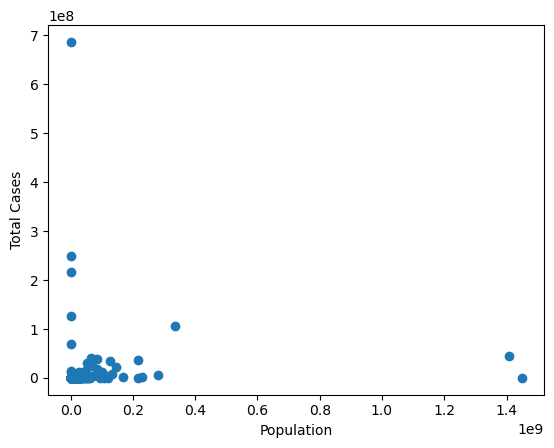

In [130]:
plt.scatter(df['population'], df['total cases'])
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()

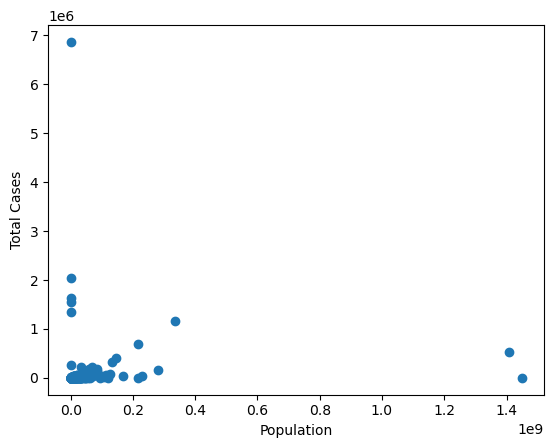

In [132]:
plt.scatter(df['population'], df['total deaths'])
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()

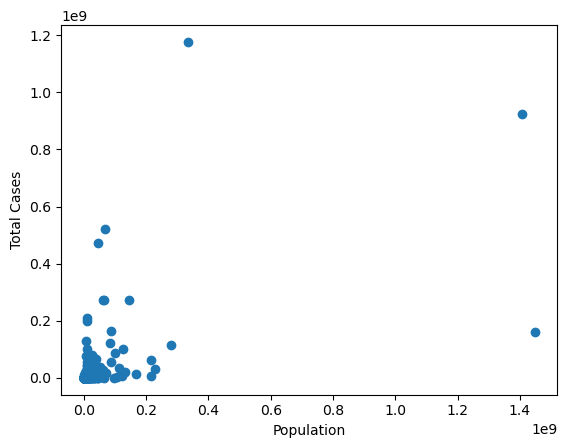

In [249]:
plt.scatter(df['population'], df['total tests'])
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()

In [355]:
X = df['total deaths'].to_numpy().reshape(-1, 1)
y = df['population'].to_numpy().reshape(-1, 1)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=32)

In [289]:
##lasso = linear_model.Lasso()
#cv_results = cross_validate(lasso, X_train, y_train, cv=3)

In [356]:
RFC = RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0, bootstrap=False)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=50,
                       random_state=0)

In [369]:
con = ['population', 'continent', 'country', 'day','time']
x_train, x_test, y_train, y_test = train_test_split(df.drop(con, axis=1), df['population'], test_size=0.3, random_state=42)

In [370]:
rf = RandomForestClassifier(n_estimators=100)

In [372]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [374]:
y_pred = rf.predict(x_test)

In [376]:
accuracy_score(y_test, y_pred)

0.041666666666666664

In [378]:
y_pred

array([  6728271,   9957464,   3496016,  32395450,   9957464,  51512762,
           43966, 215353593,    412190,  70078203, 125584838,   3496016,
             799,   9432800,  40754388,     39741,      1622,   5020199,
        32395450,      5759,   6728271, 120812698,    412190,         0,
         1496662,  70078203,   7305843,    412190,  22102838,     10982,
       120812698,   6844597,  30225582,     85732,      5759,     38387,
         2661708,  68497907,  19470234,      5759,    107609,     39730,
        17413580,    286259,  10140570,   5943546,  11680283,  27742298,
        68497907,    445431,  11056370,  11680283,   5834950,   1321910,
        40754388,  95240792,  27742298,  65584518,    176463,    627950,
         6550389,   3249317,    667490,   5943546,     10903,  38388419,
          185113,    794045,         0,  65584518,    176463,         0])

115      3378078
15       3662244
212      4898203
126     27911548
6        6779100
170     60756135
9          72344
222     98953541
112       288023
221    112508994
183     26068792
137      4446964
30          1378
190     11305652
113    106156692
55         53871
24          3539
204      5554960
86      13600464
19         15230
207     11992656
120     56215221
141       567678
235            0
10       1016097
Name: population, dtype: int32